#### Audio Classification Data Preprocessing

In [48]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='me.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [49]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.04673525 -0.05288611
  0.        ]


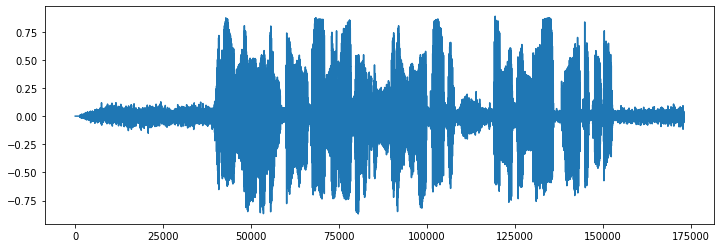

In [50]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

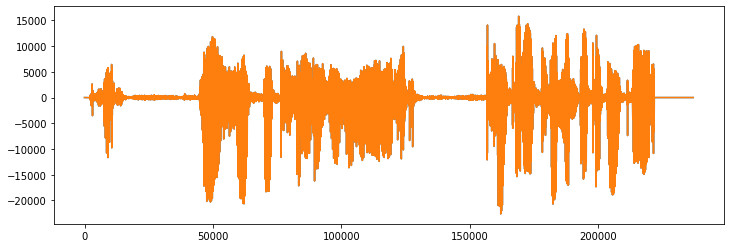

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 232)


In [8]:
mfccs

array([[-592.0277    , -543.2515    , -346.75488   , ..., -592.0277    ,
        -592.0277    , -592.0277    ],
       [   0.        ,   21.27705   ,   99.578964  , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   33.991108  ,   -1.4898205 , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,   -0.833863  ,    0.83463514, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   -6.545926  ,   -2.4634428 , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    8.133438  ,   13.120127  , ...,    0.        ,
           0.        ,    0.        ]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='data/'
metadata=pd.read_csv('df.csv')
metadata.head()

,Unnamed: 0,filename,sr,class,length
0,0,bengali (1).wav,22050,Ben,1
1,1,bengali (10).wav,22050,Ben,1
2,2,bengali (100).wav,22050,Ben,1
3,3,bengali (1000).wav,22050,Ben,1
4,4,bengali (1001).wav,22050,Ben,1


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5210it [16:10,  5.37it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(50)

,feature,class
0,"[-304.01782, 153.00266, -20.033222, 27.128628,...",Ben
1,"[-366.9295, 104.5796, 1.6490065, 32.572918, 2....",Ben
2,"[-417.5513, 74.27306, 14.805897, 22.752136, 5....",Ben
3,"[-333.0415, 88.80508, 8.954799, 17.74627, -2.0...",Ben
4,"[-470.18265, 79.68138, 6.910195, 5.140692, -19...",Ben
5,"[-419.49408, 95.38815, -4.0267053, 24.725471, ...",Ben
6,"[-435.75604, 85.11843, 16.415188, 29.098993, -...",Ben
7,"[-473.58182, 56.87197, 10.722663, 31.641932, 8...",Ben
8,"[-391.14813, 122.54106, 6.977772, 15.544952, -...",Ben
9,"[-399.23605, 84.615944, -5.6291246, 22.508556,...",Ben


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(5210, 40)

In [15]:
y

array(['Ben', 'Ben', 'Ben', ..., 'Tel', 'Tel', 'Tel'], dtype='<U3')

In [16]:
### Label Encoding
### Label Encoder
import tensorflow
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-4.39822906e+02,  9.05147705e+01, -1.28081532e+01, ...,
        -1.47961307e+00,  1.24659586e+00, -1.00170350e+00],
       [-5.44694824e+02,  9.36122055e+01, -1.30289924e+00, ...,
         5.99875972e-02,  1.04157114e+00,  4.40994382e-01],
       [-4.24670990e+02,  4.26840019e+01, -8.72466087e+00, ...,
        -3.21161079e+00, -2.33271718e+00, -2.13969350e+00],
       ...,
       [-4.36203247e+02,  7.69505844e+01, -6.64089108e+00, ...,
        -1.16004789e+00,  6.08879268e-01,  1.08785056e-01],
       [-3.36061096e+02,  9.77228241e+01, -7.60566568e+00, ...,
        -1.00028729e+00, -1.87395239e+00, -1.90911579e+00],
       [-4.39349304e+02,  9.16905212e+01,  1.54954875e+00, ...,
        -2.16510034e+00, -2.53851461e+00, -2.83214211e+00]], dtype=float32)

In [20]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(4168, 40)

In [22]:
X_test.shape

(1042, 40)

In [23]:
y_train.shape

(4168, 9)

In [24]:
y_test.shape

(1042, 9)

### Model Creation

In [25]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
### No of classes
num_labels=y.shape[1]

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
import pickle
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
126/131 [===========================>..] - ETA: 0s - loss: 22.0224 - accuracy: 0.1803
Epoch 1: val_loss improved from inf to 1.88753, saving model to saved_models\audio_classification.hdf5
131/131 [==============================] - 3s 10ms/step - loss: 21.5212 - accuracy: 0.1799 - val_loss: 1.8875 - val_accuracy: 0.2447
Epoch 2/100
126/131 [===========================>..] - ETA: 0s - loss: 4.0908 - accuracy: 0.1835
Epoch 2: val_loss did not improve from 1.88753
131/131 [==============================] - 1s 6ms/step - loss: 4.0499 - accuracy: 0.1850 - val_loss: 1.9661 - val_accuracy: 0.1862
Epoch 3/100
129/131 [============================>.] - ETA: 0s - loss: 2.3206 - accuracy: 0.2141
Epoch 3: val_loss improved from 1.88753 to 1.77036, saving model to saved_models\audio_classification.hdf5
131/131 [==============================] - 1s 6ms/step - loss: 2.3225 - accuracy: 0.2135 - val_loss: 1.7704 - val_accuracy: 0.2869
Epoch 4/100
126/131 [===========================>..] - E

In [32]:
import pickle
#filename='savemodel.sav'
pickle.dump(model, open('langmodel.pkl', 'wb'))


INFO:tensorflow:Assets written to: ram://01c0bcc0-7f4c-44b1-bbe6-fbac167f3c92/assets


In [33]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9721689224243164


In [51]:
filename= 'me.wav'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
y_predict = np.argmax(model.predict(prediction_feature))
print(y_predict)


3


In [52]:
X_test[1]

array([-3.8842337e+02,  1.6263344e+02,  4.1564279e+00,  3.1210880e+01,
        2.8965044e+01,  9.8630247e+00, -1.4527078e+00, -2.9277773e+00,
       -6.7520161e+00, -7.4811854e+00, -1.9923826e+01, -1.3195451e+01,
       -4.2994804e+00, -8.2371006e+00, -1.9249706e+00,  4.9800954e+00,
       -1.9090105e+00,  7.0302691e+00, -6.2853217e+00, -6.8735414e+00,
       -4.9750912e-01, -8.9539442e+00, -8.3023300e+00, -2.2602210e-02,
       -1.3015761e+01, -1.3894882e+00,  2.5815301e+00, -1.4271062e+01,
       -6.3224444e+00, -3.5457671e+00, -5.0423837e+00, -4.9774432e+00,
       -5.5594525e+00, -6.0795255e+00, -5.4498997e+00, -2.2268791e+00,
       -3.6930707e+00, -3.7850904e+00, -5.0449047e-02, -5.7398620e+00],
      dtype=float32)

### Testing the model with Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

Input
 - Give audio file location

Output
 - Get label of the language

In [65]:

filename="578.wav" # Give input 
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features.shape)
y_predict = np.argmax(model.predict(mfccs_scaled_features),axis=1)
print(y_predict)
prediction_class = labelencoder.inverse_transform(y_predict) 
prediction_class

#Soundarya Lahari K - 20MIS0226

[-2.9261880e+02  1.2416674e+02 -1.5991895e+01  8.9413509e+00
 -1.1853805e+01  3.1656766e+00 -1.6071205e+01 -3.2050350e+00
 -8.4462738e+00 -1.2208543e+00  1.0533941e-01 -8.4777889e+00
 -5.8162532e+00 -4.1669383e+00 -3.7161722e+00 -8.0298595e+00
 -5.8109941e+00 -2.7483838e+00 -4.7417283e+00 -4.8485723e+00
 -2.9744105e+00 -5.9975171e+00 -2.8905456e+00 -2.5137942e+00
 -2.2937081e+00  3.4978953e-01  1.4385210e+00  1.5347728e+00
  2.7428262e+00  6.0433149e-01  3.1218104e+00  3.7789292e+00
  2.1309593e+00  2.1907754e+00 -1.6306430e-01  3.4503102e-01
 -7.7754962e-01  1.6713001e+00  1.7109653e-01 -8.7095708e-01]
(1, 40)
[3]


array(['Tel'], dtype='<U3')